# Credit Card Fraud Detection


Fraudulent transactions happen every day and it is important that credit card companies are able to recognize these fraudulent credit card transactions. 

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days: 

492 fraudulent out of 284,807 transactions. The dataset is highly unbalanced where the positive class (frauds) account for 0.172% of all transactions.

https://www.kaggle.com/mlg-ulb/creditcardfraud

It contains only numerical variable inputs which are the result of a PCA transformation. Due to confidentiality the original features and more background information about the data are not included. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with the PCA are the variables 'Time' and 'Amount'. 

'Time'- contains the seconds elapsed between each transaction and the first transaction in the dataset. 
'Amount' -  transaction Amount; this feature can be used for example-dependant cost-sensitive learning. 

'Class' - is the response variable and it takes. Value 1 = Fraud and 0 = Not fraud.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.model_selection import train_test_split # data split

#https://towardsdatascience.com/credit-card-fraud-detection-using-machine-learning-python-5b098d4a8edc
#https://www.kaggle.com/faressayah/credit-card-fraud-detection-anns-vs-xgboost
#https://towardsdatascience.com/credit-card-fraud-detection-9bc8db79b956
#https://machinelearningmastery.com/imbalanced-classification-with-the-fraudulent-credit-card-transactions-dataset/
#https://www.researchgate.net/publication/336800562_Credit_Card_Fraud_Detection_using_Machine_Learning_and_Data_Science
#https://medium.com/codex/credit-card-fraud-detection-with-machine-learning-in-python-ac7281991d87
#https://www.kaggle.com/gauravduttakiit/creditcard-fraud-detection-by-logistic-regression
#https://machinelearningmastery.com/lasso-regression-with-python/

##https://github.com/luisteran5296/Credit-Card-Fraud-Detection

#https://helloml.org/detecting-credit-card-fraud-with-logistic-regression-python-implementation/

from sklearn.preprocessing import StandardScaler



%matplotlib inline
sns.set_style("whitegrid")
data = pd.read_csv("creditcard.csv")

scaler=StandardScaler()
df = pd.DataFrame(scaler.fit_transform(data.iloc[:,:-1]), columns=data.columns[:-1])

data.head()




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#any missing data
print(data.columns)
data.isnull().sum().sum()


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


0

In [5]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudulent))
print('Percentage of fraud Transactions is {}'.format(fraud_percentage))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


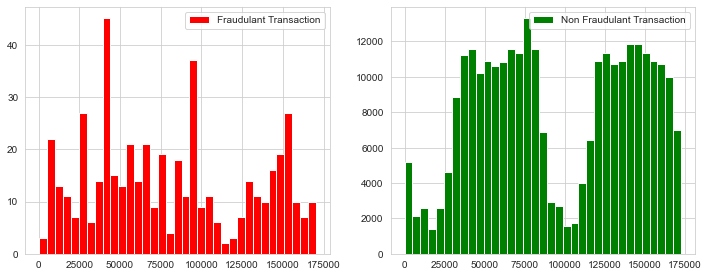

In [6]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='red', label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='green', label="Non Fraudulant Transaction")
plt.legend()

fraud = data[data['Class']==1]
Nfraud = data[data['Class']==0]



pd.concat([fraud['Amount'].describe().to_frame(),Nfraud['Amount'].describe().to_frame()], axis=1)

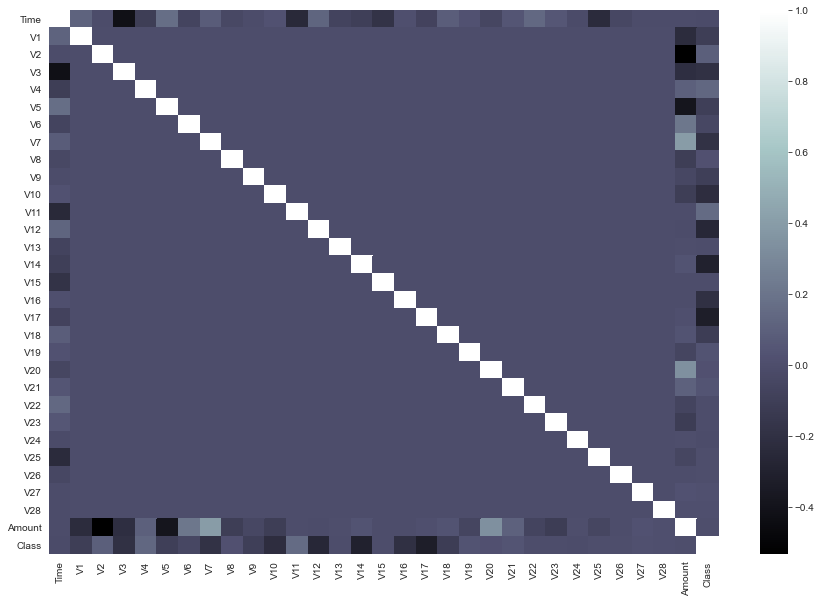

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(data=data.corr(), cmap="bone")
plt.show();

Its hard to understand the relationships between all the variables, therefore keeping the analysis simple to understand we only need to analyze the most significant columns.

We will do so by performing a Lasso regression, which is really similar to linear regression but a penalization is made to get 0 coefficient values. From this we got that the most significant variables are: V3, V10, V12, V14, V16, V17

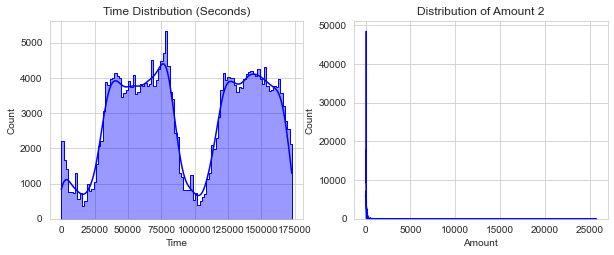

In [8]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.histplot(data['Time'], bins= 100, alpha = 0.4, kde=True, element="step",color='blue');

# #plot the amount feature

plt.subplot(2, 2, 2)
plt.title('Distribution of Amount 2')
sns.histplot(data['Amount'], alpha = 0.4, kde=True, element="step",color='blue');





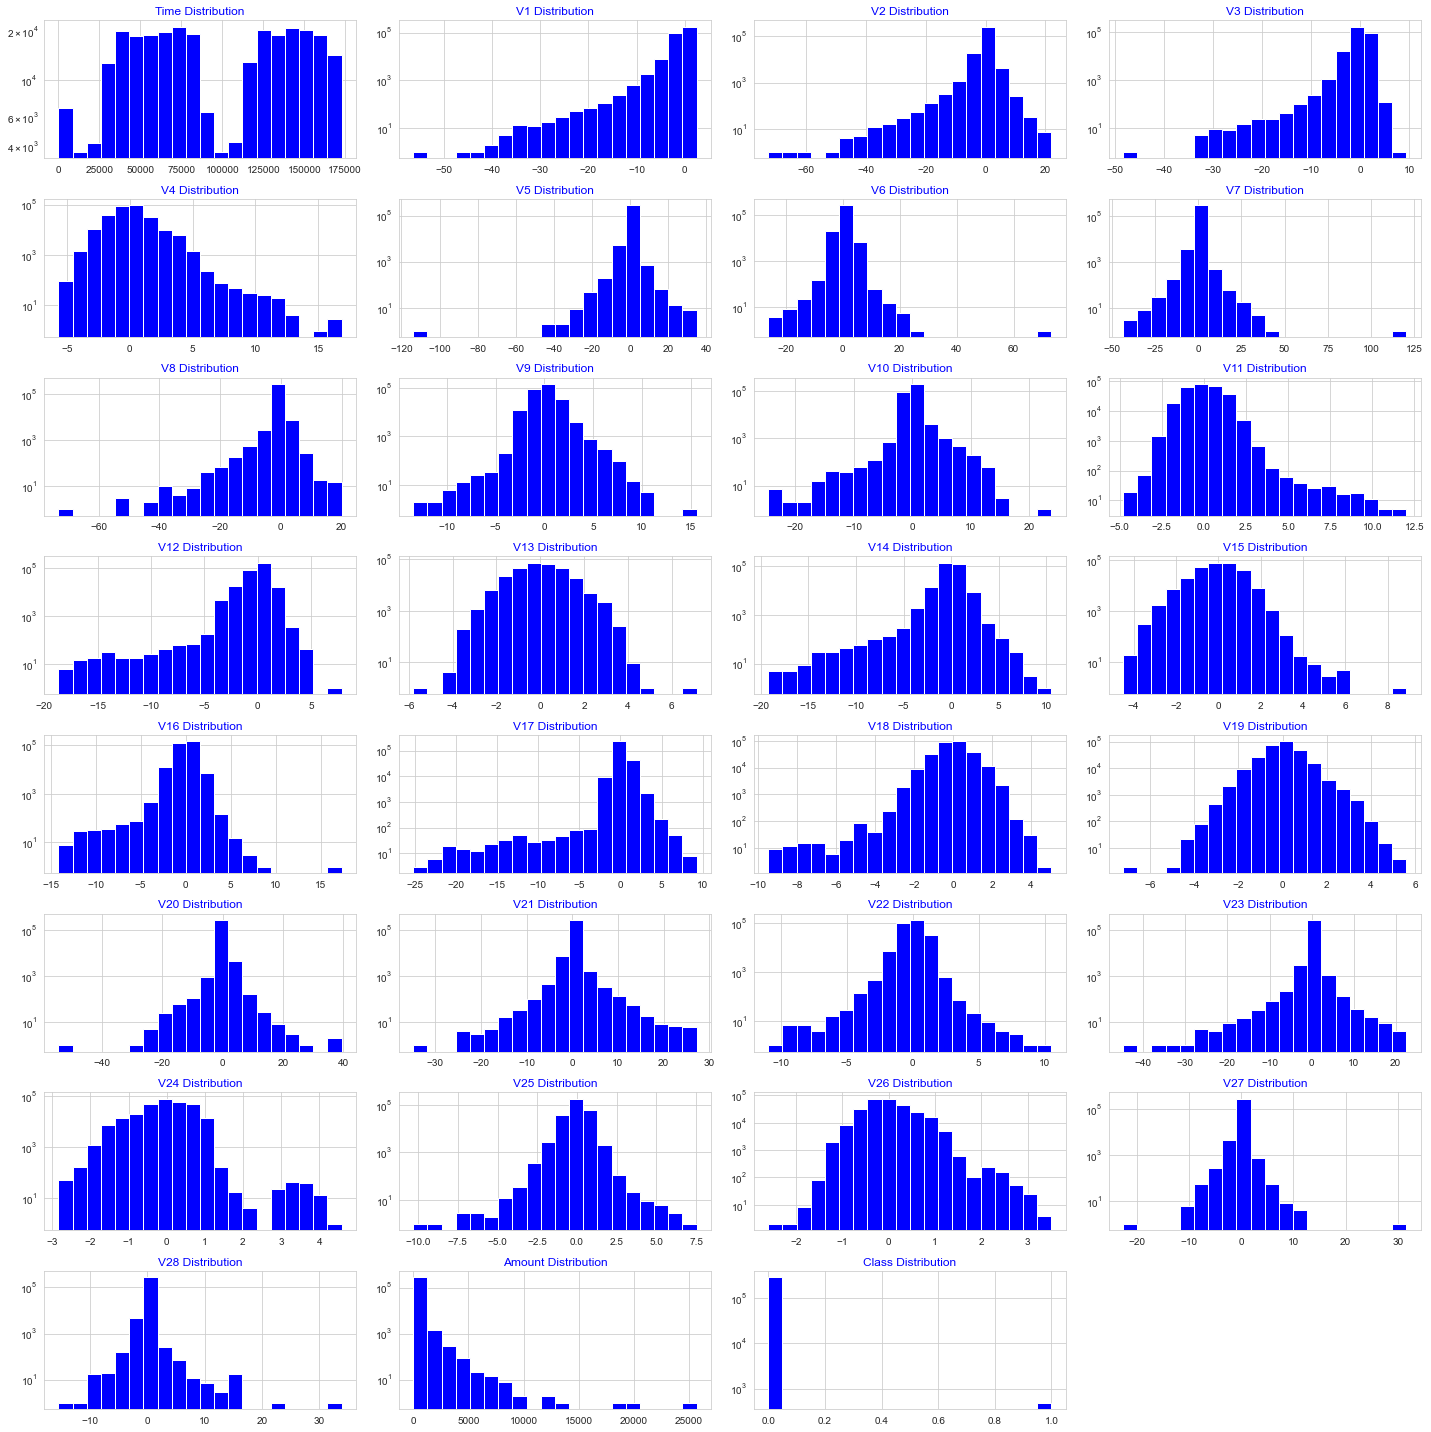

In [9]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='Blue')
        ax.set_title(feature+" Distribution",color='Blue')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,8,4)

In [10]:
data.shape

(284807, 31)

## KNN 

Standardise the data


In [11]:
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

df = pd.read_csv('creditcard.csv')

df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Shuffle the data 

In [24]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:5000]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()




,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
108600,1.339966,-0.663750,-0.167132,-0.913261,-0.552900,-0.372767,-0.436189,-0.086783,-1.060144,0.811857,...,0.459065,-0.271354,-0.467593,0.681842,-0.087080,-0.022654,0.000395,0,-0.098951,-0.501828
78188,-3.005938,-0.625939,1.885401,3.288791,0.359411,-0.416400,-1.173147,0.557114,-0.327700,0.751214,...,0.606328,-1.278511,0.754067,-0.464043,0.172341,-0.316018,-1.042539,0,-0.340915,-0.787690
51520,-1.723904,-4.793097,-0.414835,2.612057,-2.504785,0.239413,1.378201,-0.262337,0.664647,-0.759392,...,-0.740709,-1.305725,0.429184,-0.196701,-0.539952,-0.220296,0.296794,0,5.643900,-1.049103
53078,0.230133,-1.695695,1.067432,1.780355,-1.265892,1.561027,-0.635758,0.624636,1.226570,-0.344021,...,0.132147,-0.325724,-0.288239,0.119022,-0.309608,0.036747,0.085965,0,1.246005,-1.032088
99506,-1.824295,0.403327,-1.994122,2.756558,-3.139064,0.408185,-1.209045,1.095634,-1.447225,-3.951003,...,0.341727,0.947506,-0.145493,0.049326,0.831065,0.332421,0.252713,1,1.604673,-0.582543


In [25]:
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values

In [26]:
from sklearn.preprocessing import normalize
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.2)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)

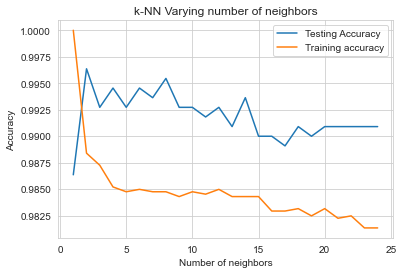

In [31]:
neighbours = np.arange(1,25)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [28]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())
predictions1 = knn.predict(X_test)

knn_accuracy_score  = accuracy_score(y_test,predictions1)
knn_precison_score  = precision_score(y_test,predictions1)
knn_recall_score    = recall_score(y_test,predictions1)
knn_f1_score        = f1_score(y_test,predictions1)

#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)


K-Nearest Neighbours
Scores
Accuracy --> 0.9963603275705186
Precison --> 1.0
Recall --> 0.9506172839506173
F1 --> 0.9746835443037974


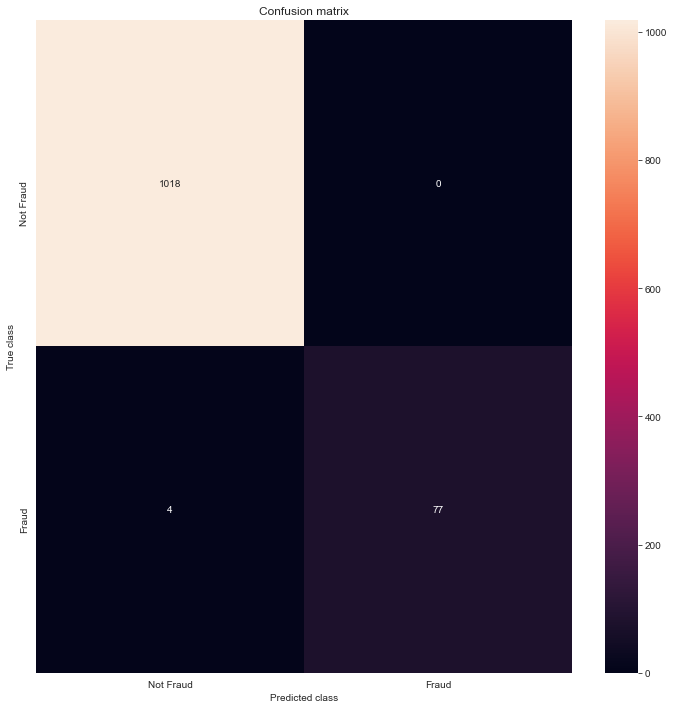

In [30]:
import seaborn as sns
LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions1)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [33]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:10000]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)


features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values

X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.2)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test= normalize(X_test)



# from sklearn.model_selection import train_test_split

# # DATA SPLIT

# X = data.drop('Class', axis = 1).values
# y = data['Class'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



print('X_train samples : ', X_train[:1])
print('X_test samples : ', X_test[0:1])
print('y_train samples : ', y_train[0:20])
print('y_test samples : ', y_test[0:20])

X_train samples :  [[ 0.33999391  0.09704635 -0.08598114  0.70253085  0.05613304 -0.02093909
   0.03709655 -0.03052454 -0.14067819  0.24058352 -0.23377285  0.077393
   0.16080624 -0.03749388 -0.29287041  0.07035646 -0.10001086 -0.11696476
  -0.24149577 -0.04337569  0.01582776  0.08723628  0.01246568  0.01258944
   0.02954032  0.01622689 -0.00354555 -0.00857358 -0.05753261  0.1235216 ]]
X_test samples :  [[-0.27650658 -0.45612486 -0.11567054  0.21921126 -0.1544668   0.08812288
   0.19666485 -0.10114124 -0.03000497 -0.06904194  0.03270087  0.02366311
  -0.06693212  0.09479556  0.02636202  0.02085411 -0.03318031  0.09413874
   0.00902679  0.3031739   0.16935039 -0.08912018 -0.16476071 -0.03048499
   0.01588793 -0.05036127 -0.01027969  0.04818931  0.60941172  0.09154709]]
y_train samples :  [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
y_test samples :  [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0

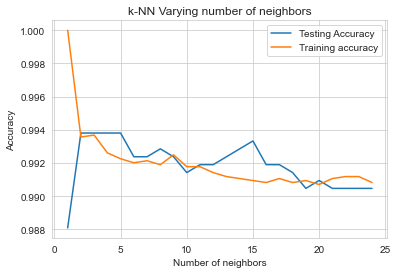

In [34]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 

    
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
#https://www.kaggle.com/maneesha96/fraud-detection-in-transaction-data-using-knn
    
# n = 5

# knn = KNeighborsClassifier(n_neighbors = n)
# knn.fit(X_train, y_train)
# knn_yhat = knn.predict(X_test)


In [60]:
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the KNN model is 0.9983146659176293


In [35]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())
predictions = knn.predict(X_test)

knn_accuracy_score  = accuracy_score(y_test,predictions)
knn_precison_score  = precision_score(y_test,predictions)
knn_recall_score    = recall_score(y_test,predictions)
knn_f1_score        = f1_score(y_test,predictions)

#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)


K-Nearest Neighbours
Scores
Accuracy --> 0.993806574559314
Precison --> 0.9883720930232558
Recall --> 0.8762886597938144
F1 --> 0.9289617486338797


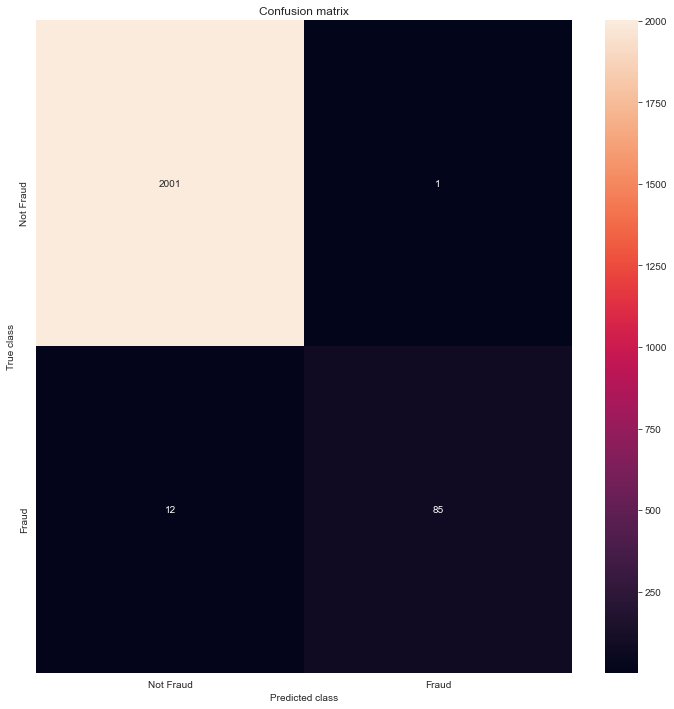

In [36]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
LABELS = ['Not Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [36]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
lr_yhat = LinReg.predict(X_test)




print('Accuracy score of the Linear regression model is {}'.format(metrics.mean_absolute_error(y_test, lr_yhat)))


Accuracy score of the Linear regression model is 0.00345328219195672


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:



from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)




sample_size = 1797




# #############################################################################
# Visualize the results on PCA-reduced data
data5 = scale(data)
reduced_data = PCA(n_components=2).fit_transform(data5)

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=20)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min = reduced_data[:, 0].min() - 1
x_max = reduced_data[:, 0].max() + 1
y_min = reduced_data[:, 1].min() - 1
y_max = reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=1)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


